# APIs and JSON

### What is an API

An API, acronym for **Application Programming Interface**, is simply a software interface that **allows two applications to talk to each other**. Unlike a user interface, which connects a computer to a person, an application programming interface connects computers or pieces of software to each other. Although it is not meant to be used directly by the end user, data analysts and data scientists may use and test it directly before implementing it into their program/analysis.

<img src="img/what-is-api.png" width="600">

### API Analogy

Imagine that you're the owner of a store and you're on holiday at the beach. Although you should be relaxing, you're concerned about your business, so you instruct your friend to call the store at the end of every day and ask how many customers came and purchased something and then write it down on a blackboard next to your beachbed.

This would be a real-world analogy of how an API works:

- the two computers or pieces of software are the blackboard on your end (usually a browser, web app or script) and the store on the other side (usually a web server/database)
- your friend is the intermediary who is doing the work of the API in connecting the two:
    - he sends a request
    - waits for a result
    - then writes the result on the board
- notice that you are not phisically making the request, you have instructed your friend, just like you write instructions for your program

### API example

You could write a script that asks the end user for a city name and, using a Google Maps API, returns the latitude and longitude coordinates of that city. Let's see how this process would work:

- The end user starts the program, the program asks the user for a city name, which he enters in the prompt box
- The program receives the city name in input and, via the Google Maps API, sends a request to Google's web server
- Google's web server receives the request and queries its database to find the relative result
- Meanwhile, the API is waiting for this result
- once the web server returns the result, the API sends it back to the requesting program (the one you wrote)
- the resulting latitude and longitude coordinates are then showed to the end user

Although there are [different types of APIs](https://en.wikipedia.org/wiki/API#Usage), we will focus on Web APIs. These are programs that use an internet address (like a URL), to provide access to their services.

### Your first API call

Let's look at a practical case. The city of Milan has a rich [Open Data portal](https://dati.comune.milano.it/) where you can access its data in several ways, namely by:
- downloading a file
- retrieving the data via an API call

When we say "API call", we mean that we are **sending a request** via the API (just like we were sending our friend to phone the store in our previous analogy).

For example, [at this page](https://dati.comune.milano.it/dataset/ds1573-gas-erogato-a2a-totale-giornaliero) we can find the **daily total gas delivered by A2A** (an italian energy provider) in cubic meters. As you can see, there are **two data formats** available, csv and json.

If we click on the csv option, we are redirected to [this page](https://dati.comune.milano.it/dataset/ds1573-gas-erogato-a2a-totale-giornaliero/resource/dbd7417a-41e8-4097-a1c4-67094983bab1), where we can **see the data in a table** and we can either download the data on our computer (see the red button that says "Download") in a specified format (csv, tsv, json or xml) or we can **retrieve the data using their API** (see the green button that says "Data API").

If you **click on the green button** that says `Data API`, a pop-up will be opened and you'll be able to see the URL that can be used to perform the API call *(note: this is also known as the [API endpoint](https://kinsta.com/knowledgebase/api-endpoint/#understanding-api-endpoints))* as well as some examples to get you started. For instance, if you **copy the following URL and paste it in your browser**, you will see the result of the API call in your browser, showing you the first 5 records of the data you were trying to retrieve ([click here](https://dati.comune.milano.it/api/3/action/datastore_search?resource_id=dbd7417a-41e8-4097-a1c4-67094983bab1&limit=5) to try it yourself!):

    https://dati.comune.milano.it/api/3/action/datastore_search?resource_id=dbd7417a-41e8-4097-a1c4-67094983bab1&limit=5

Now, before we proceed any further, there are **a couple of observations** to be made:
1. The result we're obtaining looks a little messy... what are all those curly brackets?
2. Didn't we say that APIs are not meant to be used directly by the end user?

Let's start by addressing the first point.

### JSON

The strange, messy format of the result from our API call is called **JSON**, which is an acronym that stands for **JavaScript Object Notation**.

According to [Wikipedia](https://en.wikipedia.org/wiki/JSON), *it is an open standard file format and data interchange format that uses human-readable text to store and transmit data objects consisting of attribute–value pairs and arrays*.

Let's unpack the previous sentence:
- it's a **file format** (just like a .csv file)
- it **stores data**
- the data is stored in **attribute-value** pairs

So, it's just another way of storing data, like a csv or a text file, but it stores it using a method that should be familiar to you: the attribute-value pair works just like the key-value pairs from Python's dictionaries that we have seen at the beginning of this Module.

Now, the Wikipedia definition said also that the contents of the JSON is human readable and, looking at the API result, one could understandably argue against that statement. However, if we copy that result and paste it in a **JSON formatter** like [this one](https://jsonformatter.org/), you will see that **its readability improves** quite dramatically. Check out the example below to get a better idea of this particular data format:

<img src="img/json.png" width="900">

Although to a human it is not as readable as a csv file, its **nested hierarchical structure** allows you to include all kind of metadata next to the data itself. It takes time and practice to get used to this data format, so don't get discouraged if you're finding it harder than expected.

Check out [this article](https://realpython.com/python-json/) to find out more about JSON data structures in relation to Python.

Let's now address the second observation from the previous section: APIs are meant to be used by a program, not to be typed in the address bar of a web browser. In the next section we'll look at how we can **make an API call in Python**.

### API calls in Python

#### City of Milan API

Now we have all the necessary pieces to get started and make our first API call in Python. To do that, we'll need to load the `requests` [library](https://requests.readthedocs.io/en/latest/), whose goal is to make **HTTP requests in Python** simpler and more human-friendly (as stated also in the tagline of the library's logo).

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import requests

In [2]:
# save the URL string (without the limit=5 parameter) to a "url" object
url = 'https://dati.comune.milano.it/api/3/action/datastore_search?resource_id=dbd7417a-41e8-4097-a1c4-67094983bab1&limit=1000'

The **GET** [HTTP method](https://www.w3schools.com/tags/ref_httpmethods.asp) allows you to request data from a specified resource or server. In the `requests` library this can be achieved via the `get()` function:

In [3]:
# make the HTTP request
r = requests.get(url)

In [4]:
type(r)

requests.models.Response

Every time you send a request, you will expect some data in return. Together with your data, **you will also receive a status code**, telling you whether the request was successful. Make sure to always check the status of your request via the `.status_code` attribute and to **verify the meaning** of that status. A status of 200 means that the request was successful, check [this page](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes#1xx_informational_response) for a complete list of statuses.

In [5]:
# check the status code of your HTTP request
r.status_code

200

If you're dealing with json data, you can **explore the contents of your result** using the `.json` attribute:

In [6]:
r.json()

{'help': 'https://dati.comune.milano.it/api/3/action/help_show?name=datastore_search',
 'success': True,
 'result': {'include_total': True,
  'resource_id': 'dbd7417a-41e8-4097-a1c4-67094983bab1',
  'fields': [{'type': 'int', 'id': '_id'},
   {'info': {'notes': '', 'type_override': '', 'label': ''},
    'type': 'numeric',
    'id': 'Anno'},
   {'info': {'notes': '', 'type_override': '', 'label': ''},
    'type': 'timestamp',
    'id': 'Data'},
   {'info': {'notes': '', 'type_override': '', 'label': ''},
    'type': 'text',
    'id': 'Giorno'},
   {'info': {'notes': '', 'type_override': 'numeric', 'label': ''},
    'type': 'numeric',
    'id': 'Totale (Smc)'}],
  'records_format': 'objects',
  'records': [{'_id': 1,
    'Anno': 2019,
    'Data': '2019-01-01T00:00:00',
    'Giorno': 'Martedi',
    'Totale (Smc)': 6603230},
   {'_id': 2,
    'Anno': 2019,
    'Data': '2019-01-02T00:00:00',
    'Giorno': 'Mercoledi',
    'Totale (Smc)': 6579016},
   {'_id': 3,
    'Anno': 2019,
    'Data':

We can verify that this JSON object is in fact interpreted by Python as a dictionary:

In [7]:
type(r.json())

dict

And, since it is a dictionary, it can be accessed as one by specifying its keys via the [ ] operator:

In [8]:
r.json()['result']['fields']

[{'type': 'int', 'id': '_id'},
 {'info': {'notes': '', 'type_override': '', 'label': ''},
  'type': 'numeric',
  'id': 'Anno'},
 {'info': {'notes': '', 'type_override': '', 'label': ''},
  'type': 'timestamp',
  'id': 'Data'},
 {'info': {'notes': '', 'type_override': '', 'label': ''},
  'type': 'text',
  'id': 'Giorno'},
 {'info': {'notes': '', 'type_override': 'numeric', 'label': ''},
  'type': 'numeric',
  'id': 'Totale (Smc)'}]

In the cell above we sliced the dictionary until we reached the `fields` key, which is itself a list of dictionaries. Therefore, we can cycle through each dictionary in this list and print the `id` keys, whose values contain the column names of the data that we retrieved using the API: *

In [9]:
for el in r.json()['result']['fields']:
    print(el['id'])

_id
Anno
Data
Giorno
Totale (Smc)


Luckily, we don't need to loop through nested dictionaries to get the data in a useful format. If we slice the JSON object at the `records` key, we can see that it is composed of a list of dictionaries (as many as there are rows in the original dataset), each containing a set of key-value pairs (one for each column in the dataset).

In [10]:
r.json()['result']['records'][0:3]

[{'_id': 1,
  'Anno': 2019,
  'Data': '2019-01-01T00:00:00',
  'Giorno': 'Martedi',
  'Totale (Smc)': 6603230},
 {'_id': 2,
  'Anno': 2019,
  'Data': '2019-01-02T00:00:00',
  'Giorno': 'Mercoledi',
  'Totale (Smc)': 6579016},
 {'_id': 3,
  'Anno': 2019,
  'Data': '2019-01-03T00:00:00',
  'Giorno': 'Giovedi',
  'Totale (Smc)': 7115704}]

In [11]:
len(r.json()['result']['records'])

731

Thanks to `pandas`, we can build a DataFrame using its `from_dict()` function:

In [12]:
df = pd.DataFrame.from_dict(r.json()['result']['records'])
df

,_id,Anno,Data,Giorno,Totale (Smc)
0,1,2019,2019-01-01T00:00:00,Martedi,6603230.0
1,2,2019,2019-01-02T00:00:00,Mercoledi,6579016.0
2,3,2019,2019-01-03T00:00:00,Giovedi,7115704.0
3,4,2019,2019-01-04T00:00:00,Venerdi,7650062.0
4,5,2019,2019-01-05T00:00:00,Sabato,7471068.0
...,...,...,...,...,...
726,727,2020,2020-12-27T00:00:00,Domenica,6714208.0
727,728,2020,2020-12-28T00:00:00,Lunedi,7667257.0
728,729,2020,2020-12-29T00:00:00,Martedi,7897478.0
729,730,2020,2020-12-30T00:00:00,Mercoledi,7719484.0


Let's quickly convert the `Data` variable to a datetime type and plot the time series using `seaborn`:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           731 non-null    int64  
 1   Anno          731 non-null    int64  
 2   Data          731 non-null    object 
 3   Giorno        731 non-null    object 
 4   Totale (Smc)  731 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 28.7+ KB


In [17]:
df['Data'] = pd.to_datetime(df['Data'], format="%Y-%m-%d", errors="ignore")

/var/folders/xj/lr3z9ff569d7srgh4sc80dr80000gq/T/ipykernel_86440/875687805.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Data'] = pd.to_datetime(df['Data'], format="%Y-%m-%d", errors="ignore")


In [18]:
df.head()

,_id,Anno,Data,Giorno,Totale (Smc)
0,1,2019,2019-01-01T00:00:00,Martedi,6603230.0
1,2,2019,2019-01-02T00:00:00,Mercoledi,6579016.0
2,3,2019,2019-01-03T00:00:00,Giovedi,7115704.0
3,4,2019,2019-01-04T00:00:00,Venerdi,7650062.0
4,5,2019,2019-01-05T00:00:00,Sabato,7471068.0


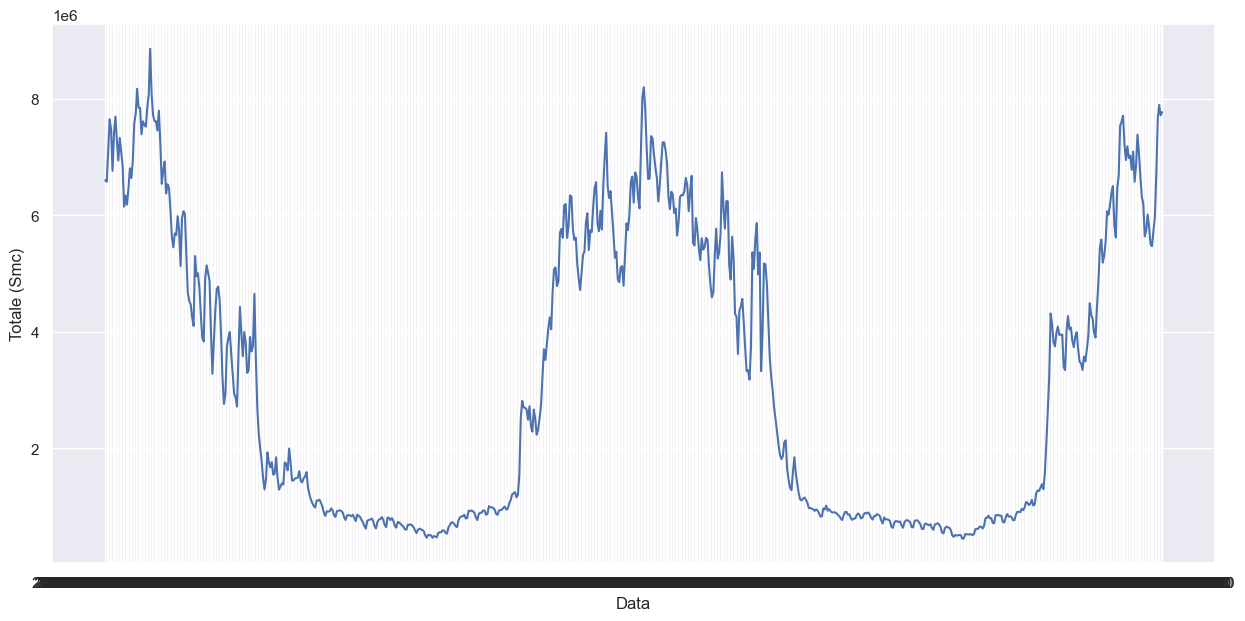

In [19]:
sns.set_theme(rc={'figure.figsize':(15, 7)})   # change the figure size
sns.lineplot(x="Data", y="Totale (Smc)", data=df)
plt.show()

#### More public APIs

At [this web page](https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/), you can find a long list of public APIs, meaning you can use them without the need to sign-up, create an account or authenticate to the service in order to access the unterlying data. To keep things nice and simple and allow you to practice more with APIs, let's look at that list and, for instance let's try the [Binance API](https://binance-docs.github.io/apidocs/spot/en/#introduction) example, which shows the endpoint to get some statistics on the [24hr Ticker Price Change](https://binance-docs.github.io/apidocs/spot/en/#24hr-ticker-price-change-statistics):

In [20]:
url_binance = 'https://api2.binance.com/api/v3/ticker/24hr'
bnc = requests.get(url_binance)
print(bnc.status_code)

ConnectionError: HTTPSConnectionPool(host='api2.binance.com', port=443): Max retries exceeded with url: /api/v3/ticker/24hr (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x12a3e7920>: Failed to resolve 'api2.binance.com' ([Errno 8] nodename nor servname provided, or not known)"))

In [35]:
bnc.status_code

NameError: name 'bnc' is not defined

In [34]:
bnc.json()[0:3]

NameError: name 'bnc' is not defined

In [ ]:
bnc_df = pd.DataFrame.from_dict(bnc.json())
bnc_df

,symbol,priceChange,priceChangePercent,weightedAvgPrice,prevClosePrice,lastPrice,lastQty,bidPrice,bidQty,askPrice,...,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
0,ETHBTC,-0.00054100,-0.989,0.05465706,0.05468800,0.05414700,0.43630000,0.05414700,16.76220000,0.05414800,...,0.05468800,0.05559700,0.05373800,240619.65760000,13151.56417374,1655749249150,1655835649150,350182692,350451681,268990
1,LTCBTC,-0.00007000,-2.693,0.00254894,0.00259900,0.00252900,45.46400000,0.00252800,65.87700000,0.00252900,...,0.00259900,0.00262300,0.00249500,194690.07500000,496.25247486,1655749248459,1655835648459,81298492,81337662,39171
2,BNBBTC,-0.00008000,-0.753,0.01053007,0.01062200,0.01054400,2.27000000,0.01054300,0.01000000,0.01054400,...,0.01062400,0.01066800,0.01038100,93665.80100000,986.30713315,1655749248760,1655835648760,188659613,188727043,67431
3,NEOBTC,-0.00001200,-2.637,0.00044496,0.00045500,0.00044300,60.00000000,0.00044200,825.40000000,0.00044300,...,0.00045500,0.00045600,0.00043700,54805.85000000,24.38626263,1655749247493,1655835647493,43596540,43600596,4057
4,QTUMETH,-0.00001100,-0.438,0.00249169,0.00252700,0.00250100,2.70000000,0.00250500,161.10000000,0.00251300,...,0.00251200,0.00252600,0.00246600,4281.30000000,10.66767670,1655749247987,1655835647987,5291446,5291754,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,ASRBUSD,0.49200000,16.689,3.12857109,2.94900000,3.44000000,4.90000000,3.43100000,58.20000000,3.44500000,...,2.94800000,3.55000000,2.91000000,457618.10000000,1431690.75620000,1655749247069,1655835647069,362765,367779,5015
2064,FIROBUSD,0.03800000,2.672,1.47672033,1.41000000,1.46000000,180.00000000,1.46000000,341.40000000,1.46400000,...,1.42200000,1.56400000,1.40400000,34055.50000000,50290.44920000,1655749243094,1655835643094,2785,3265,481
2065,NKNBUSD,0.01460000,18.159,0.09701216,0.07950000,0.09500000,105.00000000,0.09460000,5271.00000000,0.09490000,...,0.08040000,0.10790000,0.07780000,14147269.00000000,1372457.12350000,1655749244432,1655835644432,37948,43873,5926
2066,OPBNB,0.00012600,5.369,0.00236684,0.00235200,0.00247300,21.50000000,0.00246800,21.50000000,0.00247200,...,0.00234700,0.00253200,0.00227900,40729.90000000,96.40121050,1655749225637,1655835625637,1208,1788,581


In [ ]:
bnc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symbol              2068 non-null   object 
 1   priceChange         2068 non-null   object 
 2   priceChangePercent  2068 non-null   float64
 3   weightedAvgPrice    2068 non-null   object 
 4   prevClosePrice      2068 non-null   object 
 5   lastPrice           2068 non-null   object 
 6   lastQty             2068 non-null   object 
 7   bidPrice            2068 non-null   object 
 8   bidQty              2068 non-null   object 
 9   askPrice            2068 non-null   object 
 10  askQty              2068 non-null   object 
 11  openPrice           2068 non-null   object 
 12  highPrice           2068 non-null   object 
 13  lowPrice            2068 non-null   object 
 14  volume              2068 non-null   object 
 15  quoteVolume         2068 non-null   object 
 16  openTi

In [ ]:
bnc_df['priceChangePercent'] = pd.to_numeric(bnc_df['priceChangePercent'])

In [ ]:
bnc_df_top25 = bnc_df.sort_values('priceChangePercent', ascending=False).head(25)
bnc_df_top25.head()

,symbol,priceChange,priceChangePercent,weightedAvgPrice,prevClosePrice,lastPrice,lastQty,bidPrice,bidQty,askPrice,...,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
435,WAVESUSDT,2.14000000,45.726,6.07431976,4.67000000,6.82000000,4.42000000,6.81000000,1520.80000000,6.82000000,...,4.68000000,7.20000000,4.61000000,20764125.17000000,126127935.83040000,1655749249350,1655835649350,69461746,69729756,268011
727,WAVESBUSD,2.13000000,45.610,6.19895418,4.66000000,6.80000000,602.73000000,6.80000000,319.42000000,6.81000000,...,4.67000000,7.19000000,4.62000000,5325917.93000000,33015121.22210000,1655749247845,1655835647845,7213505,7302304,88800
2004,WAVESTRY,37.00000000,45.343,108.68353440,81.40000000,118.60000000,525.25700000,118.60000000,1257.99500000,118.70000000,...,81.60000000,125.00000000,80.50000000,3527711.95800000,383404203.92400000,1655749248559,1655835648559,849434,916916,67483
1976,WAVESEUR,2.00000000,44.743,5.63764943,4.43000000,6.47000000,19.24000000,6.45000000,1713.41000000,6.48000000,...,4.47000000,6.81000000,4.41000000,94492.67000000,532716.54710000,1655749245830,1655835645830,97241,100177,2937
195,WAVESETH,0.00168600,39.559,0.00540173,0.00428200,0.00594800,21.86000000,0.00593500,73.36000000,0.00595500,...,0.00426200,0.00616100,0.00421700,98324.31000000,531.12147921,1655749247933,1655835647933,5410081,5414579,4499


<AxesSubplot:xlabel='priceChangePercent', ylabel='symbol'>

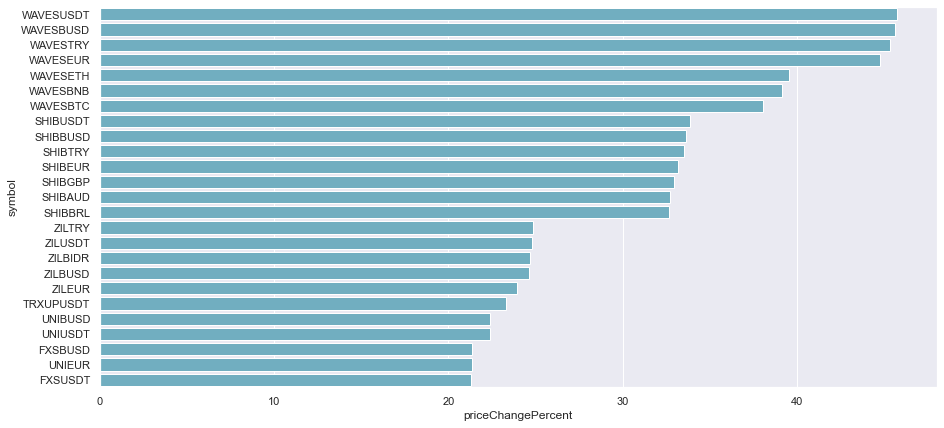

In [ ]:
sns.barplot(x='priceChangePercent',
            y="symbol",
            data=bnc_df_top25,
            color='c')